In [41]:
import pandas as pd
file_path = '/Users/romano/Desktop/twitterBot/data/cleaned_data.csv'

In [47]:
cleaned_data = pd.read_csv(file_path)

In [59]:
cleaned_data.dtypes

Ticker                              object
Date Bought                         object
Shares                             float64
Price p.share                      float64
R-vol                               object
Position size                      float64
Market Cap                         float64
Stoploss                           float64
risk                               float64
Stop-loss %                        float64
% of account                       float64
Risk of account                    float64
SELL REASON                         object
Date Sold                   datetime64[ns]
# Shares                           float64
Price Sold p.share                 float64
Sold Value                         float64
Profit(Loss) $                     float64
Profit(Loss) %                     float64
Profit(Loss) as % of acc           float64
risk/Reward ratio                  float64
Duration                           float64
Notes Buy Side                      object
Notes Sell 

In [109]:

# Assuming 'cleaned_data' is already prepared and loaded

# Convert 'Date Sold' to datetime
cleaned_data['Date Sold'] = pd.to_datetime(cleaned_data['Date Sold'], errors='coerce')

# Add a 'Month' column to group by month and year
cleaned_data['Month'] = cleaned_data['Date Sold'].dt.to_period('M')

# Group the data by month
monthly_groups = cleaned_data.groupby('Month')

# Initialize a DataFrame to store the metrics
monthly_metrics = pd.DataFrame()

# Calculate metrics
# 1. ($ Gain / Loss)
monthly_metrics['$ Gain / Loss'] = monthly_groups['Profit(Loss) $'].sum()

# 2. (% Gain / Loss): Sum the percentage profit/loss for each month
monthly_metrics['% Gain / Loss'] = monthly_groups['Profit(Loss) %'].sum()

# 3. Win %: Ratio of winning trades (profit > 0) to total trades
monthly_metrics['Win %'] = (monthly_groups.apply(lambda x: (x['Profit(Loss) $'] > 0).mean())) * 100

# 4. Average Winner %: Average percentage gain of winning trades
monthly_metrics['Average Winner %'] = monthly_groups.apply(lambda x: x.loc[x['Profit(Loss) $'] > 0, 'Profit(Loss) %'].mean())

# 5. Average Loser %: Average percentage loss of losing trades
monthly_metrics['Average Loser %'] = monthly_groups.apply(lambda x: x.loc[x['Profit(Loss) $'] < 0, 'Profit(Loss) %'].mean())

# 6. Best Win: Largest gain in a single trade in a month
monthly_metrics['Best Win'] = monthly_groups['Profit(Loss) $'].max()
monthly_metrics['Best Win %'] = monthly_groups['Profit(Loss) %'].max()

# 7. Worst Loss: Largest loss in a single trade in a month
monthly_metrics['Worst Loss'] = monthly_groups['Profit(Loss) $'].min()
monthly_metrics['Worst Loss %'] = monthly_groups['Profit(Loss) %'].min()

# 8. Profit / Loss Ratio: Average profit divided by average loss
monthly_metrics['Profit / Loss Ratio'] = monthly_groups.apply(lambda x: (
    x.loc[x['Profit(Loss) $'] > 0, 'Profit(Loss) $'].mean() / 
    -x.loc[x['Profit(Loss) $'] < 0, 'Profit(Loss) $'].mean() if not x.loc[x['Profit(Loss) $'] < 0].empty else 0))

# 9. Trades Closed: Total number of trades closed in the month
monthly_metrics['Trades Closed'] = monthly_groups.size()

# 10. Average R Gain: Average R gain for winning trades
monthly_metrics['Average R Gain'] = monthly_groups.apply(lambda x: x.loc[x['Profit(Loss) $'] > 0, 'risk/Reward ratio'].mean())

# 11. Average R Loss: Average R loss for losing trades
monthly_metrics['Average R Loss'] = monthly_groups.apply(lambda x: x.loc[x['Profit(Loss) $'] < 0, 'risk/Reward ratio'].mean())

# 12. Average R Gain/Loss Ratio: Ratio of R gain to R loss
monthly_metrics['Average R Gain/Loss Ratio'] = monthly_metrics['Average R Gain'] / -monthly_metrics['Average R Loss']

# 13. Account Return $ per Month (Total Gain/Loss for the month)
monthly_metrics['Account Return $'] = monthly_metrics['$ Gain / Loss']
monthly_metrics['Account Return %'] = monthly_groups['Profit(Loss) %'].sum()
monthly_metrics = monthly_metrics.rename(columns={"Unnamed: 0": "Month"})

# Transpose the DataFrame so that metrics are in the rows and months are in the columns
transposed_metrics = monthly_metrics.T






In [110]:
transposed_metrics.head(20)

Month,2024-08,2024-09
$ Gain / Loss,397.700000,-295.080000
% Gain / Loss,14.520000,-9.310000
Win %,40.000000,20.000000
Average Winner %,5.597500,7.470000
Average Loser %,-1.574000,-2.643333
Best Win,347.400000,320.000000
Best Win %,12.710000,15.340000
Worst Loss,-70.000000,-314.000000
Worst Loss %,-2.830000,-5.610000
Profit / Loss Ratio,3.556845,2.674066


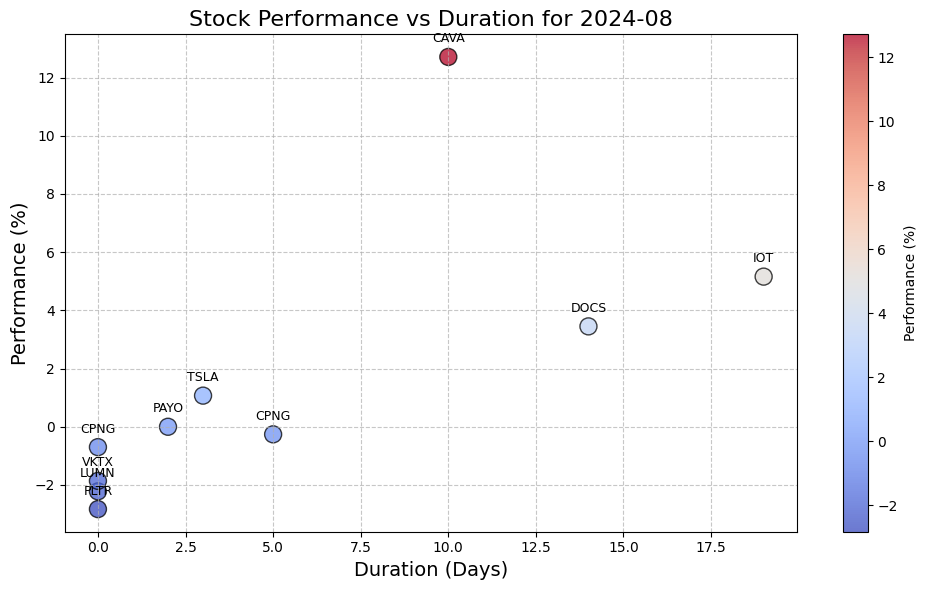

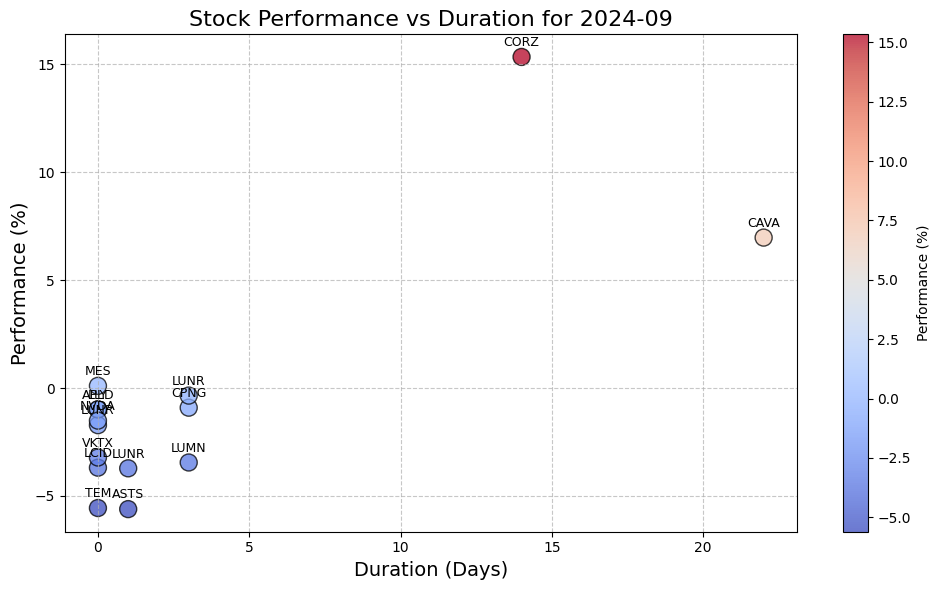

In [102]:
# Group the data by Month
monthly_data_groups = cleaned_data.groupby('Month')

# Create scatter plots for each month
for month, data in monthly_data_groups:
    plt.figure(figsize=(10,6))
    
    # Scatter plot for each month's data
    plt.scatter(data['Duration'], data['Profit(Loss) %'], c=data['Profit(Loss) %'], cmap='coolwarm', s=150, edgecolor='black', alpha=0.75)
    
    # Add text annotations for each stock
    for i, ticker in enumerate(data['Ticker']):
        plt.text(data['Duration'].iloc[i], data['Profit(Loss) %'].iloc[i] + 0.5, ticker, fontsize=9, ha='center')
    
    # Customize the plot
    plt.title(f'Stock Performance vs Duration for {month}', fontsize=16)
    plt.xlabel('Duration (Days)', fontsize=14)
    plt.ylabel('Performance (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.colorbar(label='Performance (%)')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


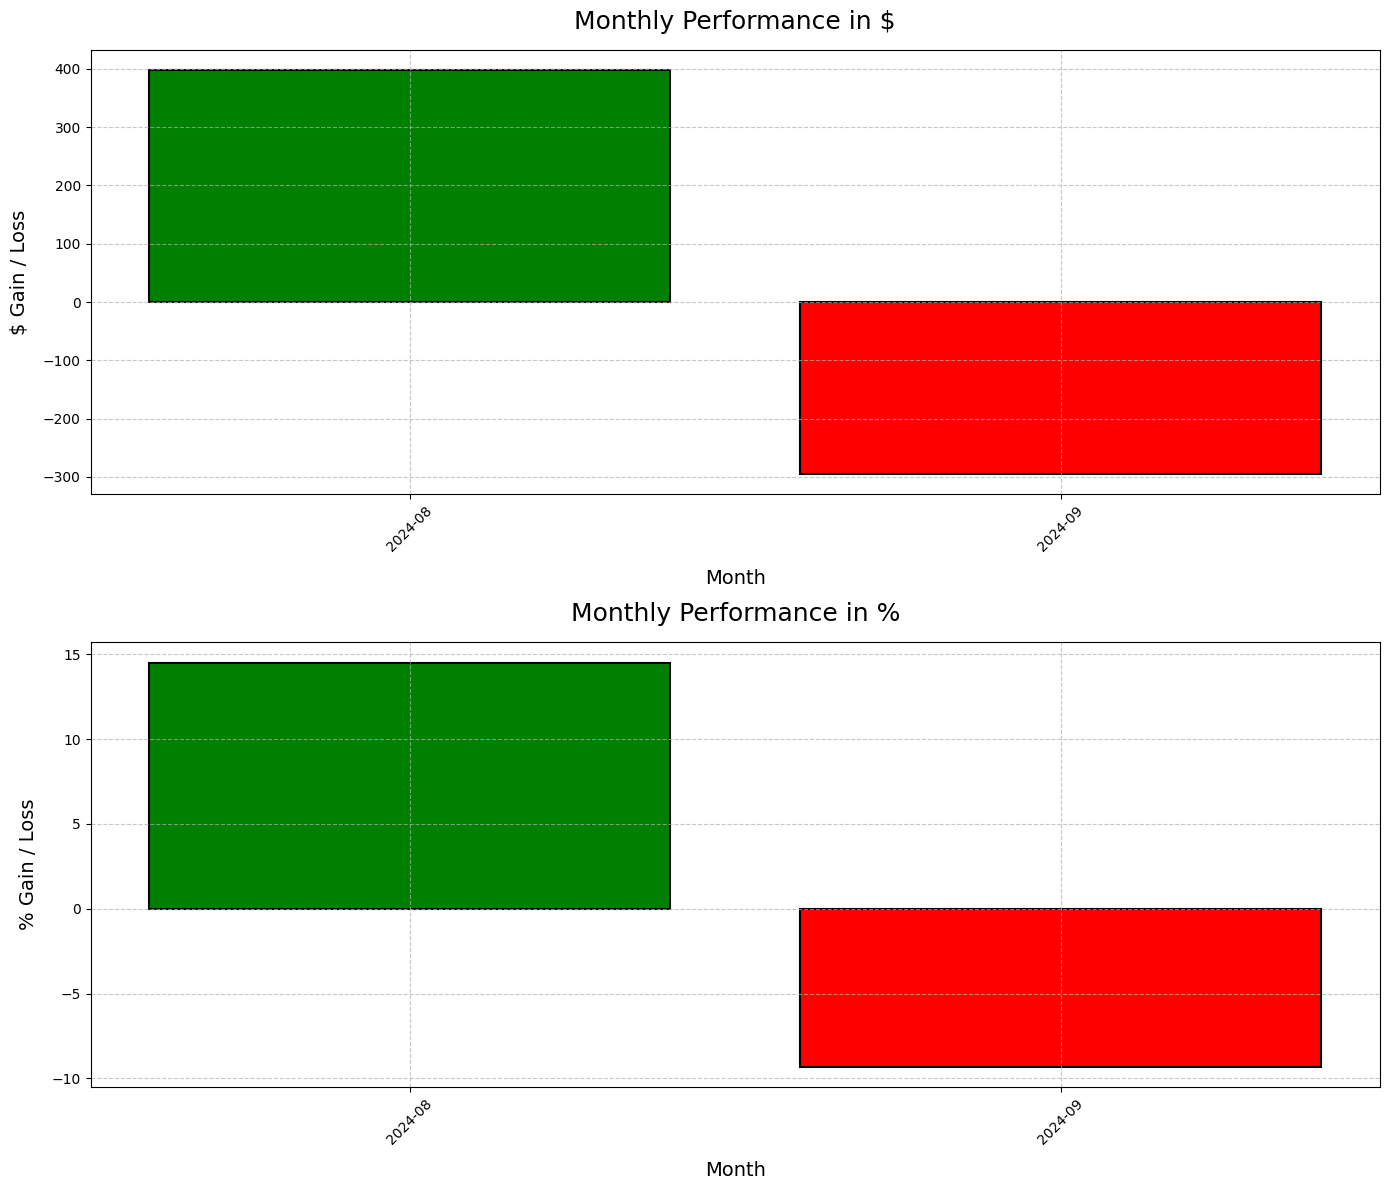

In [103]:
# Create a figure for the two separate bar charts with improved aesthetics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Aesthetic improvements for the $ Gain / Loss bar chart
colors_dollars = ['green' if val > 0 else 'red' for val in monthly_metrics['$ Gain / Loss']]
ax1.bar(monthly_metrics.index.astype(str), monthly_metrics['$ Gain / Loss'], color=colors_dollars, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Month', fontsize=14, labelpad=10)
ax1.set_ylabel('$ Gain / Loss', fontsize=14, labelpad=10)
ax1.set_title('Monthly Performance in $', fontsize=18, pad=15)
ax1.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

# Aesthetic improvements for the % Gain / Loss bar chart
colors_percent = ['green' if val > 0 else 'red' for val in monthly_metrics['% Gain / Loss']]
ax2.bar(monthly_metrics.index.astype(str), monthly_metrics['% Gain / Loss'], color=colors_percent, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Month', fontsize=14, labelpad=10)
ax2.set_ylabel('% Gain / Loss', fontsize=14, labelpad=10)
ax2.set_title('Monthly Performance in %', fontsize=18, pad=15)
ax2.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

# Customize tick labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


In [108]:
# Total number of trades
total_trades = len(cleaned_data)

# Calculate the number of winning and losing trades
winning_trades = cleaned_data[cleaned_data['Profit(Loss) $'] > 0]
losing_trades = cleaned_data[cleaned_data['Profit(Loss) $'] < 0]

# Hit Ratio
hit_ratio = (len(winning_trades) / total_trades) * 100

# Profit / Loss Ratio
avg_win = winning_trades['Profit(Loss) $'].mean()
avg_loss = -losing_trades['Profit(Loss) $'].mean()  # Use negative of loss
profit_loss_ratio = avg_win / avg_loss if avg_loss != 0 else None

# Realized Average Win % Per Trade
realized_avg_win_percent = winning_trades['Profit(Loss) %'].mean()

# Realized Average Loss % Per Trade
realized_avg_loss_percent = losing_trades['Profit(Loss) %'].mean()

# Average Hold Period For Winning Trades
avg_hold_period_win = winning_trades['Duration'].mean()

# Average Hold Period For Losing Trades
avg_hold_period_loss = losing_trades['Duration'].mean()

# Expected Value (EV)
hit_ratio_decimal = len(winning_trades) / total_trades  # Convert to decimal for EV formula
expected_value = (hit_ratio_decimal * realized_avg_win_percent) + ((1 - hit_ratio_decimal) * realized_avg_loss_percent)

# Create a DataFrame to store the total trading stats
total_stats = pd.DataFrame({
    'Hit Ratio (%)': [hit_ratio],
    'Profit / Loss Ratio': [profit_loss_ratio],
    'Realized Average Win % Per Trade': [realized_avg_win_percent],
    'Realized Average Loss % Per Trade': [realized_avg_loss_percent],
    'Average Hold Period For Winning Trades (Days)': [avg_hold_period_win],
    'Average Hold Period For Losing Trades (Days)': [avg_hold_period_loss],
    'Expected Value (EV)': [expected_value]
})

transposed_total_stats = total_stats.T
transposed_total_stats.head(10)


,0
Hit Ratio (%),25.000000
Profit / Loss Ratio,2.653971
Realized Average Win % Per Trade,6.400000
Realized Average Loss % Per Trade,-2.328824
Average Hold Period For Winning Trades (Days),11.714286
Average Hold Period For Losing Trades (Days),0.941176
Expected Value (EV),-0.146618
